# Linear regression with gradient descent
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**


$$\large         \beta  \leftarrow \beta - \alpha  \frac{\partial J(\beta)}{\partial \beta} ~~~~~~~~~~~~~~~~ (1)$$
where
$$\large
\begin{align}
J(\beta) = \mathrm{MSE} &= \frac{1}{n} \mathbf{E}^T\mathbf{E} \\
&= \frac{1}{n}  \left( \mathbf{\beta X} - \mathbf{y} \right)^T \left( \mathbf{\beta X} - \mathbf{y} \right)~~~~~~~~~~~~~~~~ (2)
\end{align}$$
and we have
$$\large   \frac{\partial J(\beta)}{\partial \beta} = \frac{1}{n}  \left( \mathbf{X}^T \left( \mathbf{\beta X} - \mathbf{y} \right) \right) $$
giving
$$\large         \beta  \leftarrow \beta -  \frac{\eta}{n}
\left( \mathbf{X}^T . \mathbf{E} \right)~~~~~~~~~~~~~~~~ (3)$$

### Feature scaling: [standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Create a 'dummy' feature

$$ z = \frac{(x - \mu)}{\sigma}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

create some synthetic data

In [2]:
# nuestros parametros "beta"
b1 =  17
b0 =  10

x = np.arange(-5, 1, 0.1)
# set a random seed
np.random.seed(42)

# store our data in a pandas dataframe
df = pd.DataFrame(x, columns = ['x'])

# ground truth without noise
# df["gt"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0
df["gt"] =  b1*df["x"] + b0

# add some random noise to make the data amore interesting
jitter = 5*(np.random.randn(60)-0.5)

df["y"] = df["gt"]+jitter

df.head()

,x,gt,y
0,-5.0,-75.0,-75.016429
1,-4.9,-73.3,-76.491322
2,-4.8,-71.6,-70.861557
3,-4.7,-69.9,-64.784851
4,-4.6,-68.2,-71.870767


plot our data

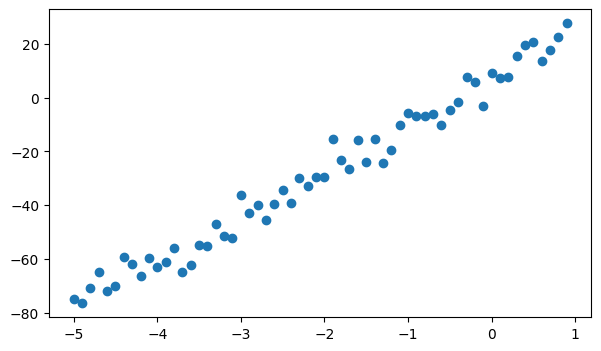

In [3]:
fig = plt.figure(figsize=(7, 4))
plt.scatter( df["x"], df["y"] );

In [4]:
# Standardize the x values
x_mean = x.mean()
x_std  = x.std()
z = (x - x_mean) / x_std

# take a look
print(min(z))
print(max(z))

-1.7034198966380236
1.7034198966380236


In [5]:
# Source: https://gist.github.com/Carl-McBride-Ellis/a60fabea3e5e15f560d8e5c33214445e

def gradient_descent(X, y_true, eta=0.1, n_iterations=5_000, tol=0.0002):
    """
    X : a min-max scaled numpy matrix, shape (m_rows, n_feats)
    y_true : a numpy matrix, shape (m_rows, 1)
    returns : beta, shape (n_feats+1, 1)
    """
    # create design matrix from X having a column of 1s for beta_0
    X1 = np.column_stack( (X, np.ones(len(X)) ) )
    # select a random starting point
    rng = np.random.default_rng()
    beta = rng.uniform( size= X1.shape[1] ).reshape(-1,1)
    costs = [] # save the costs for plotting
    n_points = np.shape(y_true)[0]

    for i in range(n_iterations):
        y_pred = X1 @ beta # linear regression
        #y_pred = sigmoid(X1 @ beta) # logistic regression
        error = y_pred - y_true
        # cost == MSE
        cost = np.sum(error**2)/ n_points
        # early stopping
        if (cost) < tol: break
        costs.append(cost) # save for plotting
        gradient = X1.T @ error
        # update the betas
        beta = beta - (eta/ n_points) * gradient

    return beta, costs

hiper-parameters: $\eta$ and the number of iterations

In [6]:
%%time

eta          = 0.01 # step size
n_iterations = 100 # number of iterations

beta, costs = gradient_descent(z, df["y"].values.reshape(-1,1), eta, n_iterations)

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 4.57 ms


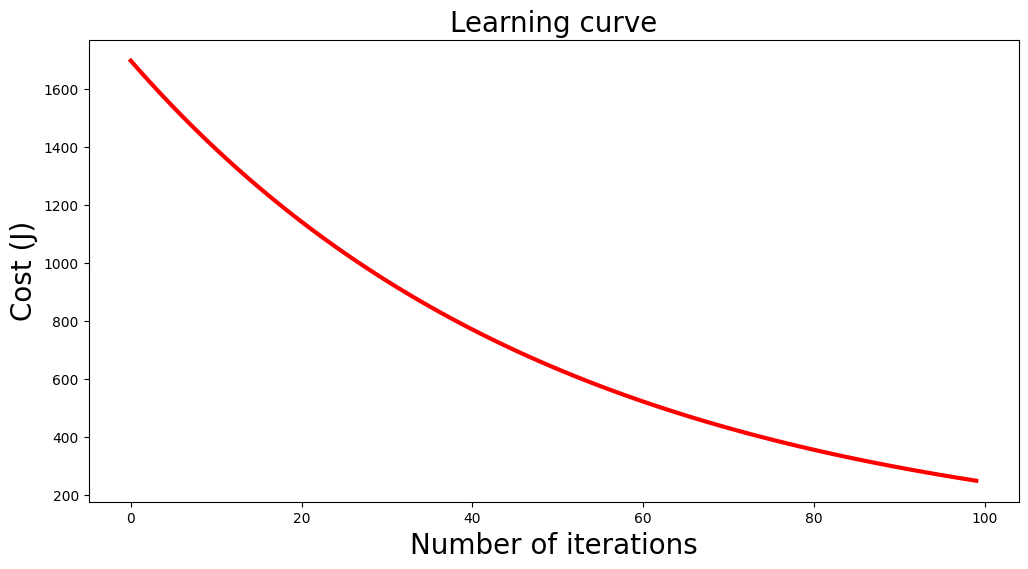

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.plot(costs[0:], lw=3, color="red")
plt.title('Learning curve', fontsize=20)
plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cost (J)', fontsize=20)
plt.show()

In [8]:
# our predictions for y using the betas
df["y_pred"] = beta[0]*z + beta[1]

In [9]:
# also calculate and overlay the OLS fit
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(z.reshape(-1, 1), df["y"])
df["y_pred_OLS"] = regressor.coef_ *z + regressor.intercept_

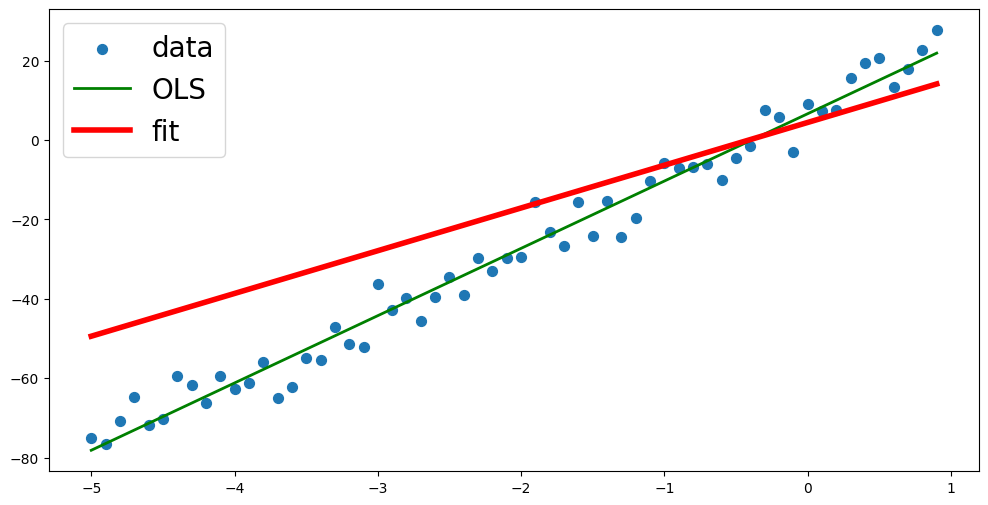

In [10]:
# plot the results of the fit
fig = plt.figure(figsize=(12, 6))
# the data
plt.scatter(df["x"], df["y"], s=50, label='data')
# our fit:
plt.plot(df["x"], df["y_pred_OLS"], color="green", lw=2, label='OLS')
plt.plot(df["x"], df["y_pred"], color="red", lw=4, label='fit')
plt.legend(loc='upper left', fontsize=20);